# 02_BaseModel2

Written by: Rupesh Kumar Dey


Notebook used for model development and testing for Base Model 2

## Importing required Libraries

In [1]:
!pip install tensorflow_hub
!pip install seaborn

You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.


In [2]:
# Importing python Libraries
# General / plotting libraries
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Image Libraries
from PIL import Image

# File System Libraries
import os
import sys
import copy
from copy import deepcopy

# Tensorflow libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, metrics, callbacks
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from HelperFunctions import * 

In [3]:
# Setting project parent directory path 
projectPath = "/notebooks"

## Model Development - Base Model 2

Base Models are the original models with default settings of 50 Epochs and with SGD Optimizer

The models are tested across 4 different types of images
1. Normal Image without any image Processing
2. CLAHE image 
3. Multiscale image
4. Rayleigh image

### 02_BaseModel2_NORMAL: Base Model 2 without Image Processing

#### Dataset Loading 

In [4]:
# Defining path of dataset
train_path = "/Dataset/Dataset_NORMAL/train"
test_path = "/Dataset/Dataset_NORMAL/val"
# Create dataset using Model Helper Function (datagen_flow)
train_data, valid_data, test_data = datagen_flow(projectPath, train_path, test_path,image_size = (224,224))

Found 4200 images belonging to 4 classes.
Found 600 images belonging to 4 classes.
Found 600 images belonging to 4 classes.


#### Model Development and Training

In [5]:
# Create & Train Model
BaseModel2_NORMAL = createBaseModel2()
# Model summary
BaseModel2_NORMAL.summary()
# Train model
checkpointPath = "TrainedResults/02_BaseModel2_NORMAL/checkpoint/02_BaseModel2_NORMAL.ckpt"
BaseModel2_NORMAL_history = trainModel(BaseModel2_NORMAL, train_data, valid_data, checkpointPath ,epochs = 50)

2022-08-25 23:24:20.436229: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-25 23:24:20.484571: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-25 23:24:20.485002: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-25 23:24:20.487157: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-25 23:24:20.487698: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read f

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 112, 112, 32)      2432      
                                                                 
 batch_normalization (BatchN  (None, 112, 112, 32)     128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 112, 112, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 55, 55, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 55, 55, 16)        12816 

2022-08-25 23:24:25.403696: I tensorflow/stream_executor/cuda/cuda_dnn.cc:377] Loaded cuDNN version 8302


131/131 [==============================] - ETA: 0s - loss: 0.3585 - accuracy: 0.8702 - recall: 0.8464
Epoch 00001: val_accuracy improved from -inf to 0.38021, saving model to TrainedResults/02_BaseModel2_NORMAL/checkpoint/02_BaseModel2_NORMAL.ckpt
131/131 [==============================] - 71s 513ms/step - loss: 0.3585 - accuracy: 0.8702 - recall: 0.8464 - val_loss: 1.2994 - val_accuracy: 0.3802 - val_recall: 0.2465
Epoch 2/50
131/131 [==============================] - ETA: 0s - loss: 0.1764 - accuracy: 0.9383 - recall: 0.9331
Epoch 00002: val_accuracy did not improve from 0.38021
131/131 [==============================] - 40s 301ms/step - loss: 0.1764 - accuracy: 0.9383 - recall: 0.9331 - val_loss: 1.2353 - val_accuracy: 0.3802 - val_recall: 0.3247
Epoch 3/50
131/131 [==============================] - ETA: 0s - loss: 0.1135 - accuracy: 0.9645 - recall: 0.9607
Epoch 00003: val_accuracy improved from 0.38021 to 0.81250, saving model to TrainedResults/02_BaseModel2_NORMAL/checkpoint/02_B

#### Loading Checkpoint & Prediction & Results

600/600 [==============================] - 6s 9ms/step
Confusion Matrix:


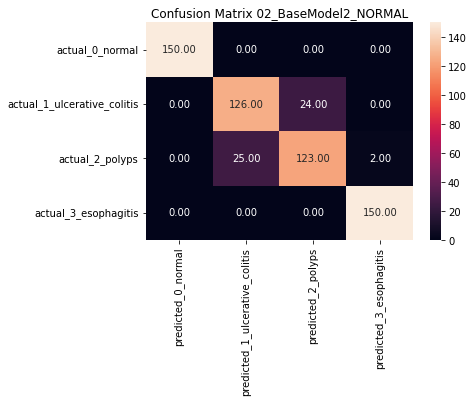

In [6]:
# Load best model from checkpoint folder
BaseModel2_NORMAL = createBaseModel2()
checkpointPath = "TrainedResults/02_BaseModel2_NORMAL/checkpoint/02_BaseModel2_NORMAL.ckpt"
loadModel(BaseModel2_NORMAL,checkpointPath)
# Generate results for validation and save
df_results, confusion_matrix, y_true, predictions = testResults(BaseModel2_NORMAL, test_data, "02_BaseModel2_NORMAL" ,
                                                                data_class = ["0_normal",
                                                                              "1_ulcerative_colitis",
                                                                              "2_polyps",
                                                                              "3_esophagitis"],
                                                                location = "TrainedResults/02_BaseModel2_NORMAL/results/confusionMatrix/02_BaseModel2_NORMAL.jpg")

2022-08-25 23:57:58.013832: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: ram://4bd62fce-9de0-41cf-9360-aca50541f23f/assets


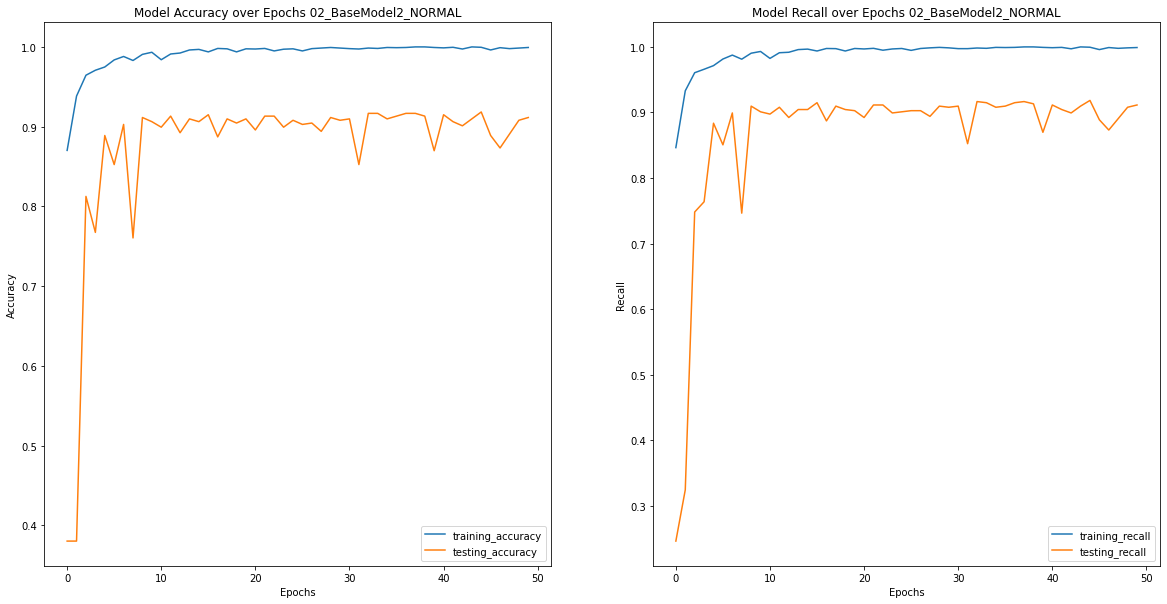

In [7]:
# Save results csv
saveResults_csv(df_results,"TrainedResults/02_BaseModel2_NORMAL/results/classificationReport/02_BaseModel2_NORMAL.csv")
# Save model training history
historyPath = "TrainedResults/02_BaseModel2_NORMAL/history/02_BaseModel2_NORMAL.npy"
save_history1(BaseModel2_NORMAL_history, historyPath)
# Load and plot model training history
history = load_history(historyPath)
plot_history(history, "02_BaseModel2_NORMAL", location = "TrainedResults/02_BaseModel2_NORMAL/history/02_BaseModel2_NORMAL.jpg")

### 02_BaseModel2_CLAHE: Base Model 2 with Image Processing CLAHE

#### Dataset Loading 

In [8]:
# Defining path of dataset
train_path = "/Dataset/Dataset_CLAHE/train"
test_path = "/Dataset/Dataset_CLAHE/val"
# Create dataset using Model Helper Function (datagen_flow)
train_data, valid_data, test_data = datagen_flow(projectPath, train_path, test_path,image_size = (224,224))

Found 4200 images belonging to 4 classes.
Found 600 images belonging to 4 classes.
Found 600 images belonging to 4 classes.


#### Model Development and Training

In [9]:
# Create and Train Model
BaseModel2_CLAHE = createBaseModel2()
# Model summary
BaseModel2_CLAHE.summary()
# Generate results for validation and save
checkpointPath = "TrainedResults/02_BaseModel2_CLAHE/checkpoint/02_BaseModel2_CLAHE.ckpt"
BaseModel2_CLAHE_history = trainModel(BaseModel2_CLAHE, train_data, valid_data, checkpointPath ,epochs = 50)

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_8 (Conv2D)           (None, 112, 112, 32)      2432      
                                                                 
 batch_normalization_14 (Bat  (None, 112, 112, 32)     128       
 chNormalization)                                                
                                                                 
 activation_8 (Activation)   (None, 112, 112, 32)      0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 55, 55, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 55, 55, 16)        1281

#### Loading Checkpoint & Prediction & Results

600/600 [==============================] - 4s 7ms/step
Confusion Matrix:


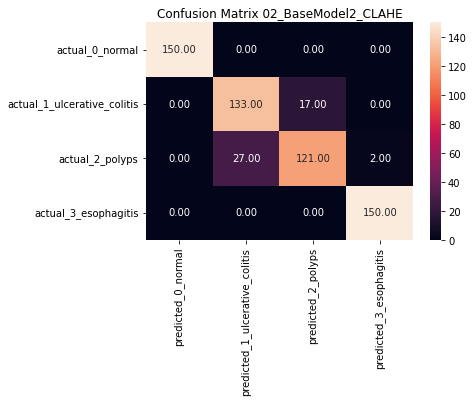

In [10]:
# Load best model from checkpoint folder
BaseModel2_CLAHE = createBaseModel2()
checkpointPath = "TrainedResults/02_BaseModel2_CLAHE/checkpoint/02_BaseModel2_CLAHE.ckpt"
loadModel(BaseModel2_CLAHE,checkpointPath)
# Generate results for validation and save
df_results, confusion_matrix, y_true, predictions = testResults(BaseModel2_CLAHE, test_data, "02_BaseModel2_CLAHE" ,
                                                                data_class = ["0_normal_CLAHE",
                                                                              "1_ulcerative_colitis_CLAHE",
                                                                              "2_polyps_CLAHE",
                                                                              "3_esophagitis_CLAHE"],
                                                                location = "TrainedResults/02_BaseModel2_CLAHE/results/confusionMatrix/02_BaseModel2_CLAHE.jpg")

INFO:tensorflow:Assets written to: ram://a4dc75d4-aec4-4b4d-9ef8-94a11fad21b4/assets


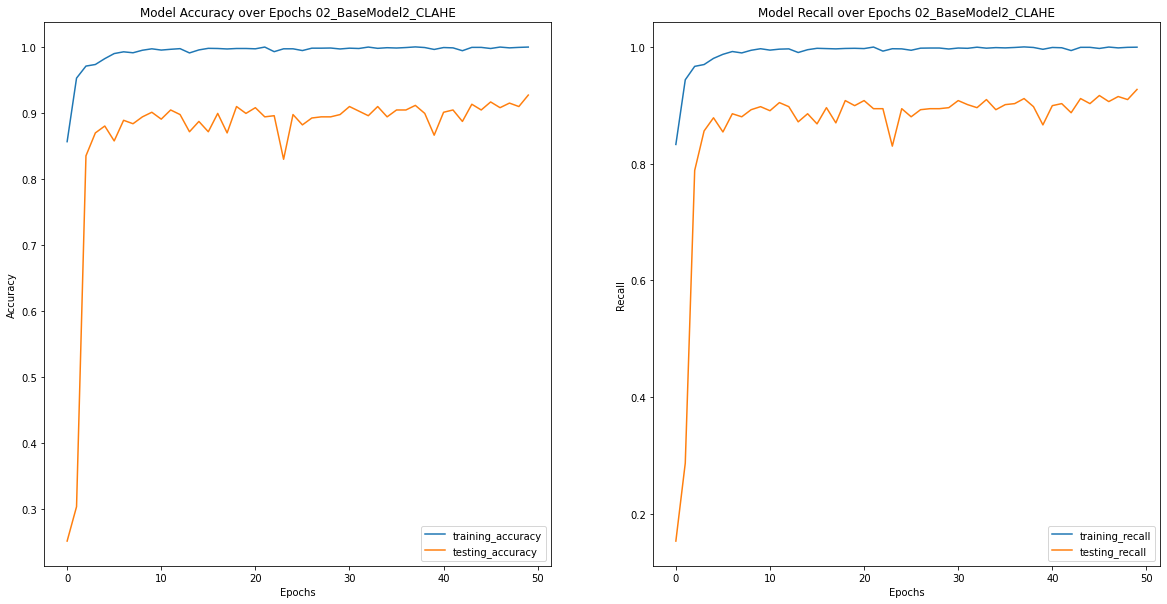

In [11]:
# Save results csv
saveResults_csv(df_results,"TrainedResults/02_BaseModel2_CLAHE/results/classificationReport/02_BaseModel2_CLAHE.csv")
# Save model training history
historyPath = "TrainedResults/02_BaseModel2_CLAHE/history/02_BaseModel2_CLAHE.npy"
save_history1(BaseModel2_CLAHE_history, historyPath)
# Load and plot model training history
history = load_history(historyPath)
plot_history(history, "02_BaseModel2_CLAHE", location = "TrainedResults/02_BaseModel2_CLAHE/history/02_BaseModel2_CLAHE.jpg")

### 02_BaseModel2_MULTISCALE: Base Model 2 with Image Processing MULTISCALE

#### Dataset Loading 

In [12]:
# Defining path of dataset
train_path = "/Dataset/Dataset_MULTISCALE/train"
test_path = "/Dataset/Dataset_MULTISCALE/val"
# Create dataset using Model Helper Function (datagen_flow)
train_data, valid_data, test_data = datagen_flow(projectPath, train_path, test_path,image_size = (224,224))

Found 4200 images belonging to 4 classes.
Found 600 images belonging to 4 classes.
Found 600 images belonging to 4 classes.


#### Model Development and Training

In [13]:
# Create and Train Model
BaseModel2_MULTISCALE = createBaseModel2()
# Model summary
BaseModel2_MULTISCALE.summary()
# Train model
checkpointPath = "TrainedResults/02_BaseModel2_MULTISCALE/checkpoint/02_BaseModel2_MULTISCALE.ckpt"
BaseModel2_MULTISCALE_history = trainModel(BaseModel2_MULTISCALE, train_data, valid_data, checkpointPath ,epochs = 50)

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_16 (Conv2D)          (None, 112, 112, 32)      2432      
                                                                 
 batch_normalization_28 (Bat  (None, 112, 112, 32)     128       
 chNormalization)                                                
                                                                 
 activation_16 (Activation)  (None, 112, 112, 32)      0         
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 55, 55, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 55, 55, 16)        1281

#### Loading Checkpoint & Prediction & Results

600/600 [==============================] - 4s 7ms/step
Confusion Matrix:


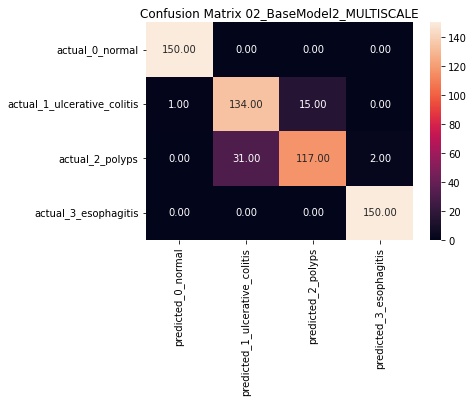

In [14]:
# Load best model from checkpoint folder
BaseModel2_MULTISCALE = createBaseModel2()
checkpointPath = "TrainedResults/02_BaseModel2_MULTISCALE/checkpoint/02_BaseModel2_MULTISCALE.ckpt"
loadModel(BaseModel2_MULTISCALE,checkpointPath)
# Generate results for validation and save
df_results, confusion_matrix, y_true, predictions = testResults(BaseModel2_MULTISCALE, test_data, "02_BaseModel2_MULTISCALE" ,
                                                                data_class = ["0_normal_MULTISCALE",
                                                                              "1_ulcerative_colitis_MULTISCALE",
                                                                              "2_polyps_MULTISCALE",
                                                                              "3_esophagitis_MULTISCALE"],
                                                                location = "TrainedResults/02_BaseModel2_MULTISCALE/results/confusionMatrix/02_BaseModel2_MULTISCALE.jpg")

INFO:tensorflow:Assets written to: ram://2eab7c6a-5e6d-4027-8adb-aa9c2a8e68da/assets


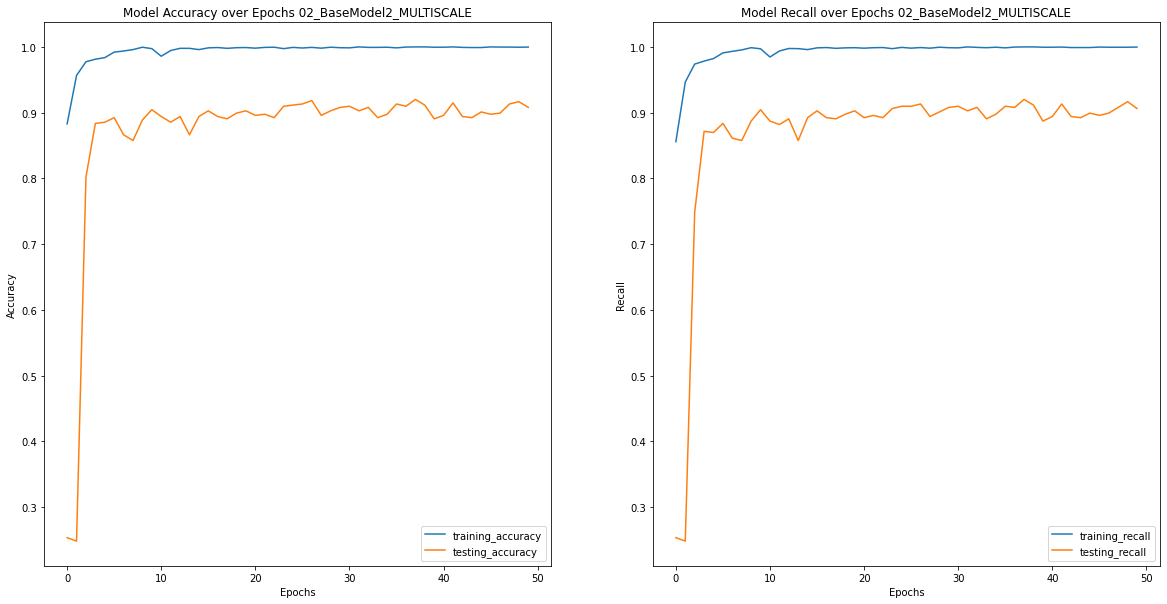

In [15]:
# Save results csv
saveResults_csv(df_results,"TrainedResults/02_BaseModel2_MULTISCALE/results/classificationReport/02_BaseModel2_MULTISCALE.csv")
# Save model training history
historyPath = "TrainedResults/02_BaseModel2_MULTISCALE/history/02_BaseModel2_MULTISCALE.npy"
save_history1(BaseModel2_MULTISCALE_history, historyPath)
# Load and plot model training history
history = load_history(historyPath)
plot_history(history, "02_BaseModel2_MULTISCALE", location = "TrainedResults/02_BaseModel2_MULTISCALE/history/02_BaseModel2_MULTISCALE.jpg")

### 02_BaseModel2_RAYLEIGH: Base Model 2 with Image Processing RAYLEIGH

#### Dataset Loading 

In [16]:
# Defining path of dataset
train_path = "/Dataset/Dataset_RAYLEIGH/train"
test_path = "/Dataset/Dataset_RAYLEIGH/val"
# Create dataset using Model Helper Function (datagen_flow)
train_data, valid_data, test_data = datagen_flow(projectPath, train_path, test_path,image_size = (224,224))

Found 4200 images belonging to 4 classes.
Found 600 images belonging to 4 classes.
Found 600 images belonging to 4 classes.


#### Model Development and Training

In [17]:
# Create and Train Model
BaseModel2_RAYLEIGH = createBaseModel2()
# Model sumamry
BaseModel2_RAYLEIGH.summary()
# Train model
checkpointPath = "TrainedResults/02_BaseModel2_RAYLEIGH/checkpoint/02_BaseModel2_RAYLEIGH.ckpt"
BaseModel2_RAYLEIGH_history = trainModel(BaseModel2_RAYLEIGH, train_data, valid_data, checkpointPath ,epochs = 50)

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_24 (Conv2D)          (None, 112, 112, 32)      2432      
                                                                 
 batch_normalization_42 (Bat  (None, 112, 112, 32)     128       
 chNormalization)                                                
                                                                 
 activation_24 (Activation)  (None, 112, 112, 32)      0         
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 55, 55, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 55, 55, 16)        1281

#### Loading Checkpoint & Prediction & Results

600/600 [==============================] - 4s 6ms/step
Confusion Matrix:


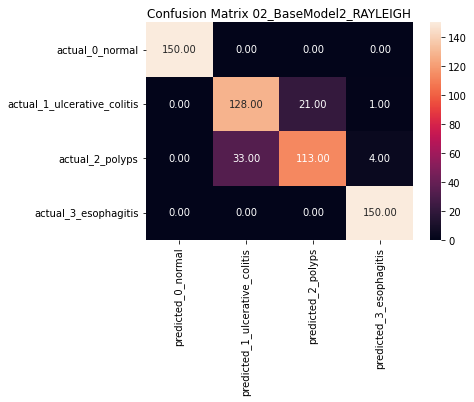

In [18]:
# Load best model from checkpoint folder
BaseModel2_RAYLEIGH = createBaseModel2()
checkpointPath = "TrainedResults/02_BaseModel2_RAYLEIGH/checkpoint/02_BaseModel2_RAYLEIGH.ckpt"
loadModel(BaseModel2_RAYLEIGH,checkpointPath)
# Generate results for validation and save
df_results, confusion_matrix, y_true, predictions = testResults(BaseModel2_RAYLEIGH, test_data, "02_BaseModel2_RAYLEIGH" ,
                                                                data_class = ["0_normal_RAYLEIGH",
                                                                              "1_ulcerative_colitis_RAYLEIGH",
                                                                              "2_polyps_RAYLEIGH",
                                                                              "3_esophagitis_RAYLEIGH"],
                                                                location = "TrainedResults/02_BaseModel2_RAYLEIGH/results/confusionMatrix/02_BaseModel2_RAYLEIGH.jpg")

INFO:tensorflow:Assets written to: ram://88a0c274-10b4-4a3a-82e5-59107a8b092d/assets


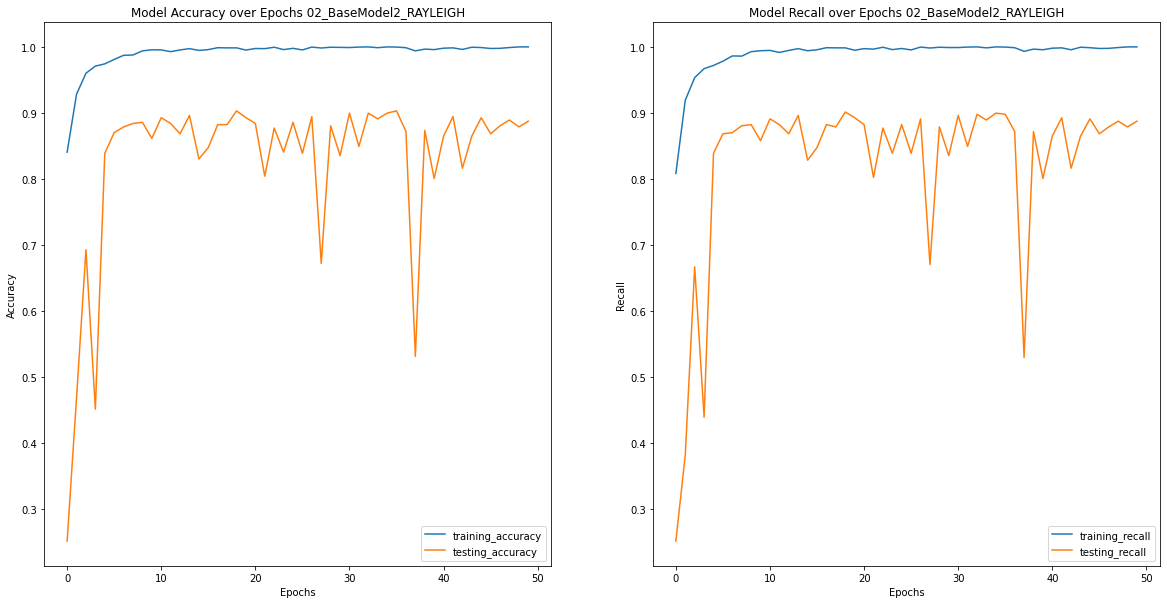

In [19]:
# Save results csv
saveResults_csv(df_results,"TrainedResults/02_BaseModel2_RAYLEIGH/results/classificationReport/02_BaseModel2_RAYLEIGH.csv")
# Save model training history
historyPath = "TrainedResults/02_BaseModel2_RAYLEIGH/history/02_BaseModel2_RAYLEIGH.npy"
save_history1(BaseModel2_RAYLEIGH_history, historyPath)
# Load and plot model training history
history = load_history(historyPath)
plot_history(history, "02_BaseModel2_RAYLEIGH", location = "TrainedResults/02_BaseModel2_RAYLEIGH/history/02_BaseModel2_RAYLEIGH.jpg")

### 02_BaseModel2_MULTISCALE_tunedAdam: Base Model 2 with Image Processing MULTISCALE (Optimizer - Adam)

#### Dataset Loading 

In [20]:
# Defining path of dataset
train_path = "/Dataset/Dataset_MULTISCALE/train"
test_path = "/Dataset/Dataset_MULTISCALE/val"
# Create dataset using Model Helper Function (datagen_flow)
train_data, valid_data, test_data = datagen_flow(projectPath, train_path, test_path,image_size = (224,224))

Found 4200 images belonging to 4 classes.
Found 600 images belonging to 4 classes.
Found 600 images belonging to 4 classes.


#### Model Development and Training

In [21]:
# Create and Train Model
BaseModel2_MULTISCALE_tunedAdam = createBaseModel2(optimizer = tf.keras.optimizers.Adam())
# Model summary
BaseModel2_MULTISCALE_tunedAdam.summary()
# Train model
checkpointPath = "TrainedResults/02_BaseModel2_MULTISCALE_tunedAdam/checkpoint/02_BaseModel2_MULTISCALE_tunedAdam.ckpt"
BaseModel2_MULTISCALE_tunedAdam_history = trainModel(BaseModel2_MULTISCALE_tunedAdam, train_data, valid_data, checkpointPath ,epochs = 50)

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_32 (Conv2D)          (None, 112, 112, 32)      2432      
                                                                 
 batch_normalization_56 (Bat  (None, 112, 112, 32)     128       
 chNormalization)                                                
                                                                 
 activation_32 (Activation)  (None, 112, 112, 32)      0         
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 55, 55, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_33 (Conv2D)          (None, 55, 55, 16)        1281

#### Loading Checkpoint & Prediction & Results

600/600 [==============================] - 4s 7ms/step
Confusion Matrix:


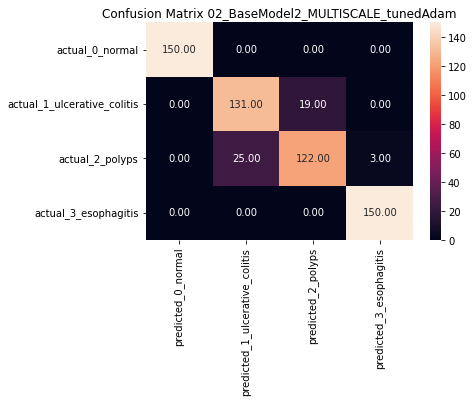

In [22]:
# Load best model from checkpoint folder
BaseModel2_MULTISCALE_tunedAdam = createBaseModel2()
checkpointPath = "TrainedResults/02_BaseModel2_MULTISCALE_tunedAdam/checkpoint/02_BaseModel2_MULTISCALE_tunedAdam.ckpt"
loadModel(BaseModel2_MULTISCALE_tunedAdam,checkpointPath)
# Generate results for validation and save
df_results, confusion_matrix, y_true, predictions = testResults(BaseModel2_MULTISCALE_tunedAdam, test_data, "02_BaseModel2_MULTISCALE_tunedAdam" ,
                                                                data_class = ["0_normal_MULTISCALE",
                                                                              "1_ulcerative_colitis_MULTISCALE",
                                                                              "2_polyps_MULTISCALE",
                                                                              "3_esophagitis_MULTISCALE"],
                                                                location = "TrainedResults/02_BaseModel2_MULTISCALE_tunedAdam/results/confusionMatrix/02_BaseModel2_MULTISCALE_tunedAdam.jpg")

INFO:tensorflow:Assets written to: ram://dc2091bd-34a8-4cfe-960f-b2f356d9bdf7/assets


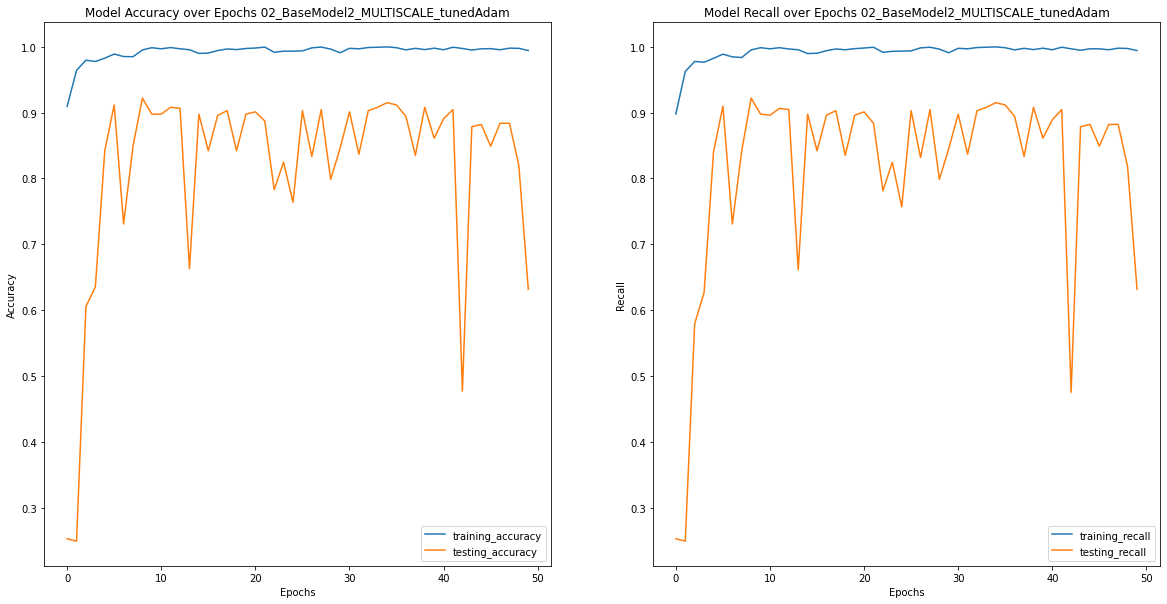

In [23]:
# Save results csv
saveResults_csv(df_results,"TrainedResults/02_BaseModel2_MULTISCALE_tunedAdam/results/classificationReport/02_BaseModel2_MULTISCALE_tunedAdam.csv")
# Save model training history
historyPath = "TrainedResults/02_BaseModel2_MULTISCALE_tunedAdam/history/02_BaseModel2_MULTISCALE_tunedAdam.npy"
save_history1(BaseModel2_MULTISCALE_tunedAdam_history, historyPath)
# Load and plot model trainign history
history = load_history(historyPath)
plot_history(history, "02_BaseModel2_MULTISCALE_tunedAdam", location = "TrainedResults/02_BaseModel2_MULTISCALE_tunedAdam/history/02_BaseModel2_MULTISCALE_tunedAdam.jpg")

### 02_BaseModel2_MULTISCALE_tunedLrScheduler: Base Model 2 with Image Processing MULTISCALE (Optimizer - LrScheduler)

#### Dataset Loading 

In [24]:
# Defining path of dataset
train_path = "/Dataset/Dataset_MULTISCALE/train"
test_path = "/Dataset/Dataset_MULTISCALE/val"
# Create dataset using Model Helper Function (datagen_flow)
train_data, valid_data, test_data = datagen_flow(projectPath, train_path, test_path,image_size = (224,224))

Found 4200 images belonging to 4 classes.
Found 600 images belonging to 4 classes.
Found 600 images belonging to 4 classes.


#### Model Development and Training

In [25]:
# Create and Train Model
BaseModel2_MULTISCALE_tunedLrScheduler = createBaseModel2()
# Model summary
BaseModel2_MULTISCALE_tunedLrScheduler.summary()
# Train Model
checkpointPath = "TrainedResults/02_BaseModel2_MULTISCALE_tunedLrScheduler/checkpoint/02_BaseModel2_MULTISCALE_tunedLrScheduler.ckpt"
BaseModel2_MULTISCALE_tunedLrScheduler_history = trainModelLrScheduler(BaseModel2_MULTISCALE_tunedLrScheduler, train_data, valid_data, checkpointPath ,epochs = 50, epochCutOff = 25, reductionRatio = 2)

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_40 (Conv2D)          (None, 112, 112, 32)      2432      
                                                                 
 batch_normalization_70 (Bat  (None, 112, 112, 32)     128       
 chNormalization)                                                
                                                                 
 activation_40 (Activation)  (None, 112, 112, 32)      0         
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 55, 55, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_41 (Conv2D)          (None, 55, 55, 16)        128

#### Loading Checkpoint & Prediction & Results

600/600 [==============================] - 4s 6ms/step
Confusion Matrix:


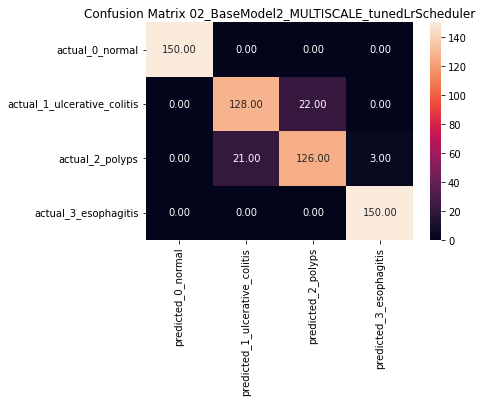

In [26]:
# Load best model from checkpoint folder
BaseModel2_MULTISCALE_tunedLrScheduler = createBaseModel2()
checkpointPath = "TrainedResults/02_BaseModel2_MULTISCALE_tunedLrScheduler/checkpoint/02_BaseModel2_MULTISCALE_tunedLrScheduler.ckpt"
loadModel(BaseModel2_MULTISCALE_tunedLrScheduler,checkpointPath)
# Generate results for validation and save
df_results, confusion_matrix, y_true, predictions = testResults(BaseModel2_MULTISCALE_tunedLrScheduler, test_data, "02_BaseModel2_MULTISCALE_tunedLrScheduler" ,
                                                                data_class = ["0_normal_MULTISCALE",
                                                                              "1_ulcerative_colitis_MULTISCALE",
                                                                              "2_polyps_MULTISCALE",
                                                                              "3_esophagitis_MULTISCALE"],
                                                                location = "TrainedResults/02_BaseModel2_MULTISCALE_tunedLrScheduler/results/confusionMatrix/02_BaseModel2_MULTISCALE_tunedLrScheduler.jpg")

INFO:tensorflow:Assets written to: ram://76e2dd3e-cff7-4305-a3e2-e1c22b8e196d/assets


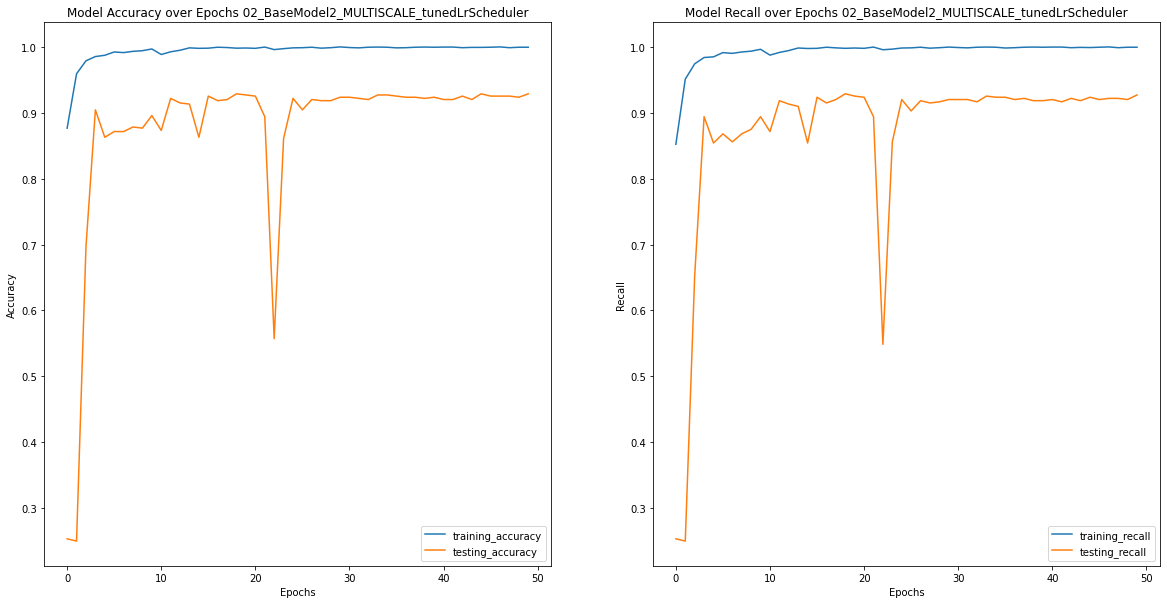

In [28]:
# Save results csv
saveResults_csv(df_results,"TrainedResults/02_BaseModel2_MULTISCALE_tunedLrScheduler/results/classificationReport/02_BaseModel2_MULTISCALE_tunedLrScheduler.csv")
# Save model training history
historyPath = "TrainedResults/02_BaseModel2_MULTISCALE_tunedLrScheduler/history/02_BaseModel2_MULTISCALE_tunedLrScheduler.npy"
save_history1(BaseModel2_MULTISCALE_tunedLrScheduler_history, historyPath)
# Load and plot model training history
history = load_history(historyPath)
plot_history(history, "02_BaseModel2_MULTISCALE_tunedLrScheduler", location = "TrainedResults/02_BaseModel2_MULTISCALE_tunedLrScheduler/history/02_BaseModel2_MULTISCALE_tunedLrScheduler.jpg")

### 02_BaseModel2_MULTISCALE_tunedAdamLrScheduler: Base Model 2 with Image Processing MULTISCALE (Optimizer - Adam + LrScheduler)

In [29]:
# Defining path of dataset
train_path = "/Dataset/Dataset_MULTISCALE/train"
test_path = "/Dataset/Dataset_MULTISCALE/val"
# Create dataset using Model Helper Function (datagen_flow)
train_data, valid_data, test_data = datagen_flow(projectPath, train_path, test_path,image_size = (224,224))

Found 4200 images belonging to 4 classes.
Found 600 images belonging to 4 classes.
Found 600 images belonging to 4 classes.


#### Model Development and Training

In [30]:
# Create and Train Model
BaseModel2_MULTISCALE_tunedAdamLrScheduler = createBaseModel2()
# Model summary
BaseModel2_MULTISCALE_tunedAdamLrScheduler.summary()
# Train model 
checkpointPath = "TrainedResults/02_BaseModel2_MULTISCALE_tunedAdamLrScheduler/checkpoint/02_BaseModel2_MULTISCALE_tunedAdamLrScheduler.ckpt"
BaseModel2_MULTISCALE_tunedAdamLrScheduler_history = trainModelLrScheduler(BaseModel2_MULTISCALE_tunedAdamLrScheduler, train_data, valid_data, checkpointPath ,epochs = 50, epochCutOff = 25, reductionRatio = 2)

Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_48 (Conv2D)          (None, 112, 112, 32)      2432      
                                                                 
 batch_normalization_84 (Bat  (None, 112, 112, 32)     128       
 chNormalization)                                                
                                                                 
 activation_48 (Activation)  (None, 112, 112, 32)      0         
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 55, 55, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_49 (Conv2D)          (None, 55, 55, 16)        128

#### Loading Checkpoint & Prediction & Results

600/600 [==============================] - 4s 6ms/step
Confusion Matrix:


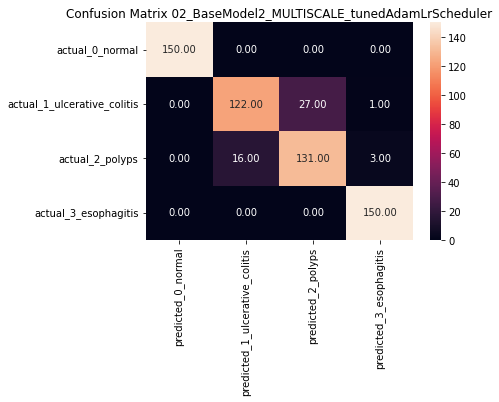

In [31]:
# Load best model from checkpoint folder
BaseModel2_MULTISCALE_tunedAdamLrScheduler = createBaseModel2()
checkpointPath = "TrainedResults/02_BaseModel2_MULTISCALE_tunedAdamLrScheduler/checkpoint/02_BaseModel2_MULTISCALE_tunedAdamLrScheduler.ckpt"
loadModel(BaseModel2_MULTISCALE_tunedAdamLrScheduler,checkpointPath)
# generate results for validation and save
df_results, confusion_matrix, y_true, predictions = testResults(BaseModel2_MULTISCALE_tunedAdamLrScheduler, test_data, "02_BaseModel2_MULTISCALE_tunedAdamLrScheduler" ,
                                                                data_class = ["0_normal_MULTISCALE",
                                                                              "1_ulcerative_colitis_MULTISCALE",
                                                                              "2_polyps_MULTISCALE",
                                                                              "3_esophagitis_MULTISCALE"],
                                                                location = "TrainedResults/02_BaseModel2_MULTISCALE_tunedAdamLrScheduler/results/confusionMatrix/02_BaseModel2_MULTISCALE_tunedAdamLrScheduler.jpg")

INFO:tensorflow:Assets written to: ram://ff3ac6e1-99c3-4783-bda2-4a3de4678587/assets


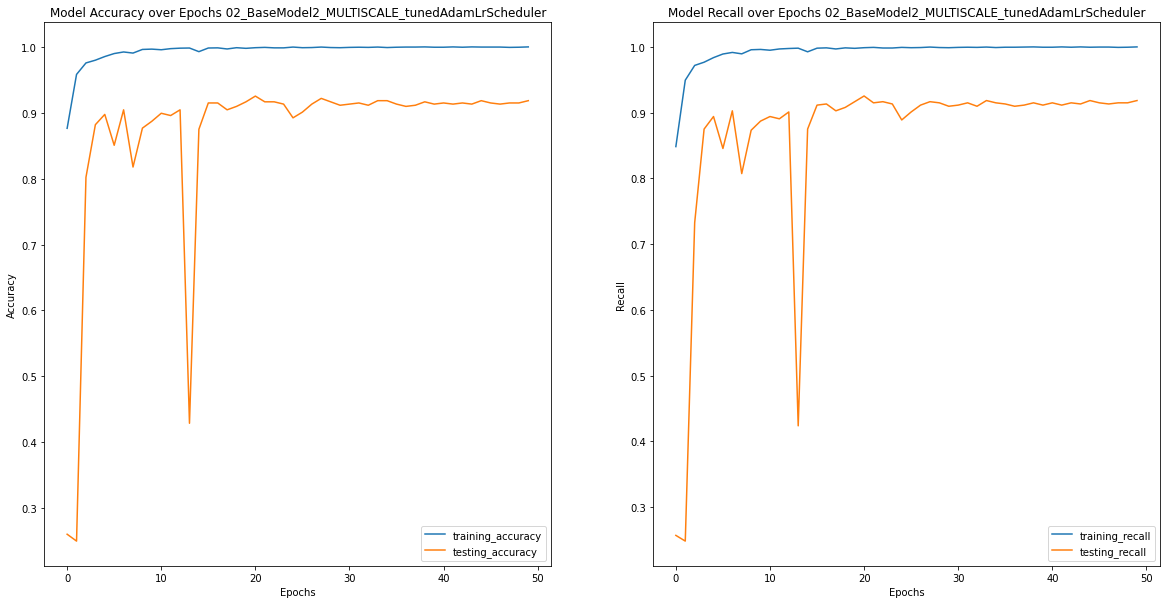

In [32]:
# Save results csv
saveResults_csv(df_results,"TrainedResults/02_BaseModel2_MULTISCALE_tunedAdamLrScheduler/results/classificationReport/02_BaseModel2_MULTISCALE_tunedAdamLrScheduler.csv")
# Save model training history
historyPath = "TrainedResults/02_BaseModel2_MULTISCALE_tunedAdamLrScheduler/history/02_BaseModel2_MULTISCALE_tunedAdamLrScheduler.npy"
save_history1(BaseModel2_MULTISCALE_tunedAdamLrScheduler_history, historyPath)
# Load and plot model training history.  
history = load_history(historyPath)
plot_history(history, "02_BaseModel2_MULTISCALE_tunedAdamLrScheduler", location = "TrainedResults/02_BaseModel2_MULTISCALE_tunedAdamLrScheduler/history/02_BaseModel2_MULTISCALE_tunedAdamLrScheduler.jpg")